# Peeking Simulator

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.power import TTestIndPower
from scipy.stats import norm

# A/A Test Peeking

In [ ]:
def pooled_standard_error(s1, s2, n1, n2):
    """
    Calculate the pooled standard error for comparing two means.
    
    Parameters:
    s1 (float): Standard deviation of the control group.
    s2 (float): Standard deviation of the experimental group.
    n1 (int): Sample size of the control group.
    n2 (int): Sample size of the experimental group.
    
    Returns:
    float: Pooled standard error.
    """
    pooled_se = np.sqrt(((s1**2) / n1) + ((s2**2) / n2))
    return pooled_se


def z_to_p_value(z_score, two_tailed=True):
    """
    Calculate the p-value from a z-score.
    """

    if two_tailed:
        # Two-tailed p-value
        p_value = 2 * (1 - norm.cdf(abs(z_score)))
    else:
        # One-tailed p-value
        p_value = 1 - norm.cdf(z_score) if z_score > 0 else norm.cdf(z_score)
    
    return p_value

In [32]:
effect_size = 0.02
alpha = 0.05 # significance level, false positive probability
power = 0.8 # probability of correctly rejecting the null hypothesis

In [36]:
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='larger')
print(f"Sample size per group: {sample_size:.0f}")


Sample size per group: 30913


In [89]:
point_estimate_lst = []
sample_lst = []
confidence_level_lst = []
p_value_lst = []

for n in range(2,round(sample_size)+1, 350):
    control = np.random.standard_normal(size=n)
    treatment = np.random.standard_normal(size=n)
    point_estimate = (control - treatment).mean()
    pooled_se = pooled_standard_error(s1=control.std(), s2=treatment.std(), n1=n, n2=n)
    z = point_estimate / pooled_se
    p_value = z_to_p_value(z, two_tailed=False)

    confidence_level_lst.append(1 - p_value)
    p_value_lst.append(p_value)
    point_estimate_lst.append(point_estimate)
    sample_lst.append(n)

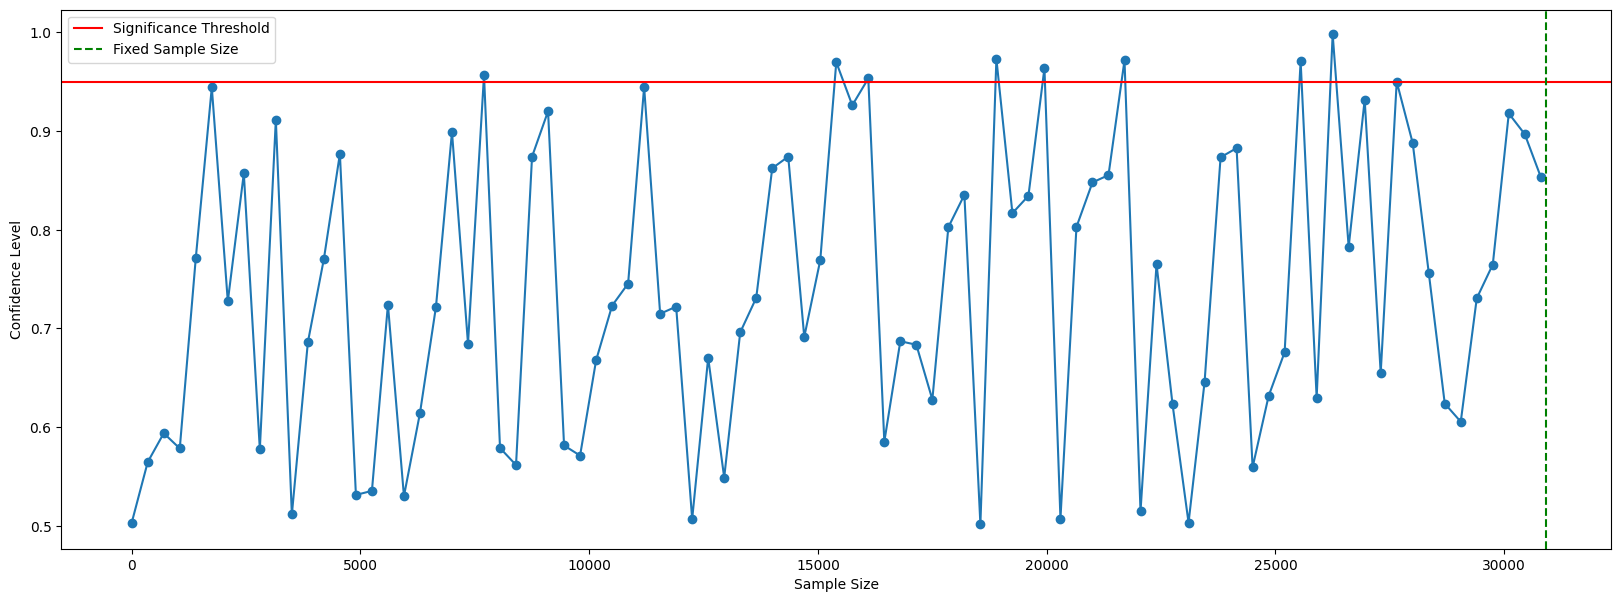

In [93]:
plt.figure(figsize=(20,7))
plt.plot(sample_lst,confidence_level_lst, marker='o')
plt.axhline(1-alpha, c='red', label='Significance Threshold')
plt.axvline(round(sample_size), c='green', label='Fixed Sample Size', ls='--')
plt.ylabel("Confidence Level")
plt.xlabel("Sample Size")
plt.legend()
plt.show()

In [95]:
p_value_lst[-1] < alpha

np.False_

In [117]:



aa_tests = []
for test in range(100): # running 100 A/A Tests

    point_estimate_lst = []
    sample_lst = []
    confidence_level_lst = []
    p_value_lst = []

    for n in range(2,round(sample_size)+1, 350):
        control = np.random.standard_normal(size=n)
        treatment = np.random.standard_normal(size=n)
        point_estimate = (control - treatment).mean()
        pooled_se = pooled_standard_error(s1=control.std(), s2=treatment.std(), n1=n, n2=n)
        z = point_estimate / pooled_se
        p_value = z_to_p_value(z, two_tailed=False)

        confidence_level_lst.append(1 - p_value)
        p_value_lst.append(p_value)
        point_estimate_lst.append(point_estimate)
        sample_lst.append(n)

    aa_tests.append(p_value_lst[-1])

    

In [115]:
sum(np.array(aa_tests) < alpha)

np.int64(13)

In [119]:
len(aa_tests)

100

# Sequential Testing

In [120]:
n_lst = []
mean_lst = []
std_error_lst = []
std_error_log_lst = []

for n in range(10,10000, 1):
    mean  = np.random.standard_normal(size=n).mean()
    n_lst.append(n)
    mean_lst.append(mean)
    std_error_lst.append(1/np.sqrt(n))
    std_error_log_lst.append(np.sqrt(np.log(n)/n))

Text(0, 0.5, 'Sample Mean')

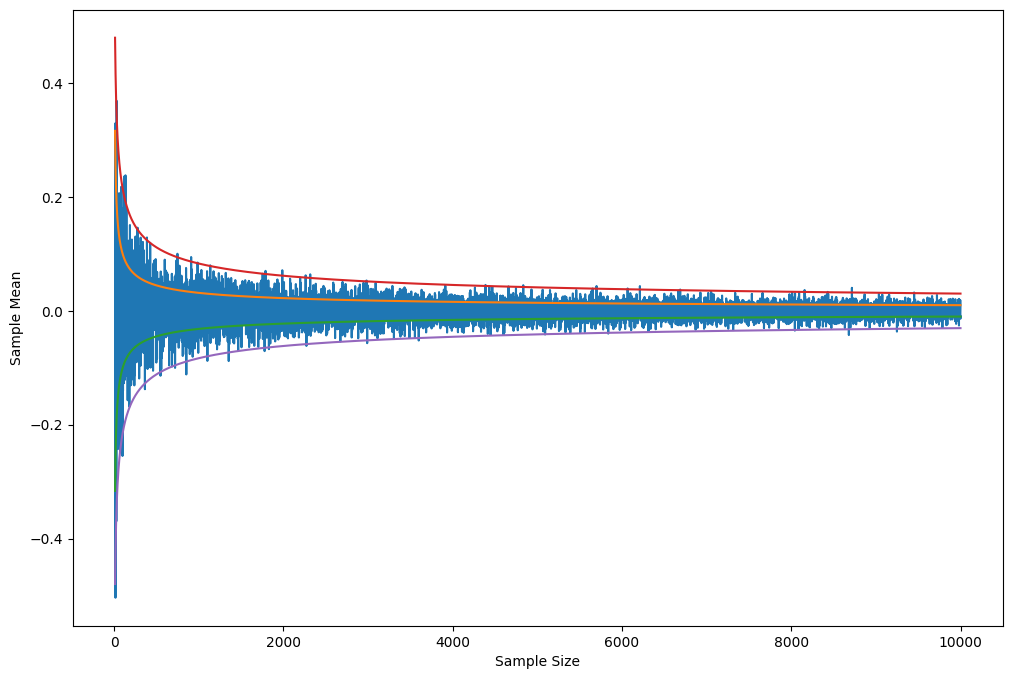

In [121]:
plt.figure(figsize=(12,8))
plt.plot(n_lst, mean_lst)
plt.plot(n_lst, std_error_lst)
plt.plot(n_lst, [-1*i for i in std_error_lst])

plt.plot(n_lst, std_error_log_lst)
plt.plot(n_lst, [-1*i for i in std_error_log_lst])
plt.xlabel("Sample Size")
plt.ylabel("Sample Mean")